In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data description

In [78]:
customer_data = pd.read_csv('CustomerData.csv')
customer_data.head()

,CustomerKey,IncomeGroup,BikeBuyer,GeographyKey,FullName,Age,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,MaritalStatus,NumberCarsOwned,MonthsSinceLastPurchase,CommuteDistance
0,11000,High,1,26,Jon Yang,49,M,90000.0,2,0,Bachelors,Professional,1,M,0,27,1-2 Miles
1,11001,Moderate,1,37,Eugene Huang,45,M,60000.0,3,3,Bachelors,Professional,0,S,1,20,0-1 Miles
2,11002,Moderate,1,31,Ruben Torres,50,M,60000.0,3,3,Bachelors,Professional,1,M,1,30,2-5 Miles
3,11003,High,1,11,Christy Zhu,48,F,70000.0,0,0,Bachelors,Professional,0,S,1,27,5-10 Miles
4,11004,High,1,19,Elizabeth Johnson,42,F,80000.0,5,5,Bachelors,Professional,1,S,4,27,1-2 Miles


### Missing values?

In [79]:
(customer_data.isnull()).any()

CustomerKey                False
IncomeGroup                False
BikeBuyer                  False
GeographyKey               False
FullName                   False
Age                        False
Gender                     False
YearlyIncome               False
TotalChildren              False
NumberChildrenAtHome       False
EnglishEducation           False
EnglishOccupation          False
HouseOwnerFlag             False
MaritalStatus              False
NumberCarsOwned            False
MonthsSinceLastPurchase    False
CommuteDistance            False
dtype: bool

### Bike buyers

In [80]:
customer_data.BikeBuyer.describe()

count    18484.000000
mean         0.494049
std          0.499978
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: BikeBuyer, dtype: float64

In [81]:
customer_data.BikeBuyer.value_counts(normalize=True)

0    0.505951
1    0.494049
Name: BikeBuyer, dtype: float64

['Gender', 'EnglishEducation', 'EnglishOccupation', 'HouseOwnerFlag', 'MaritalStatus', 'CommuteDistance']


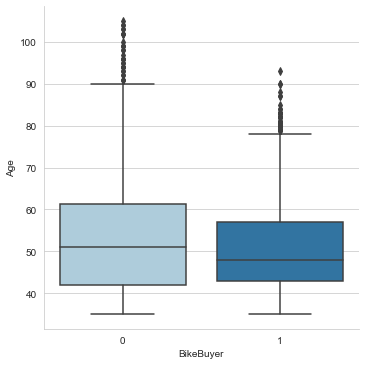

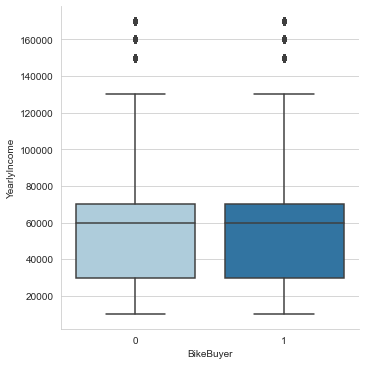

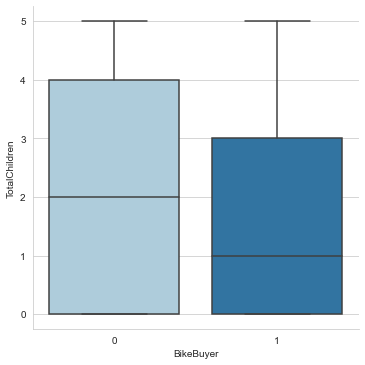

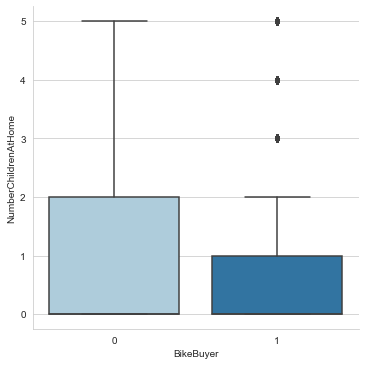

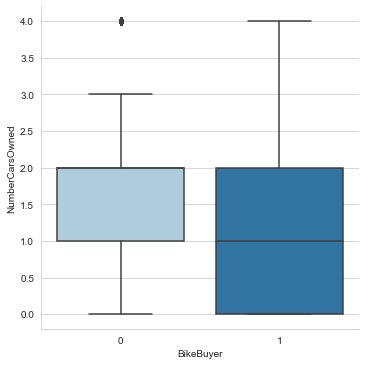

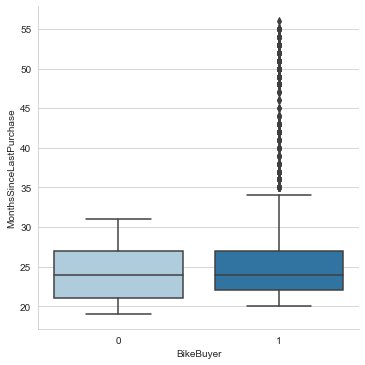

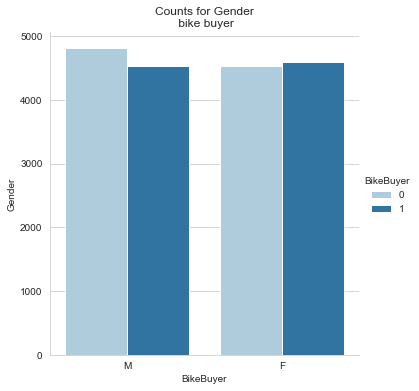

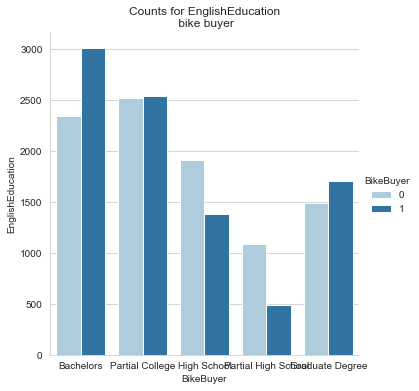

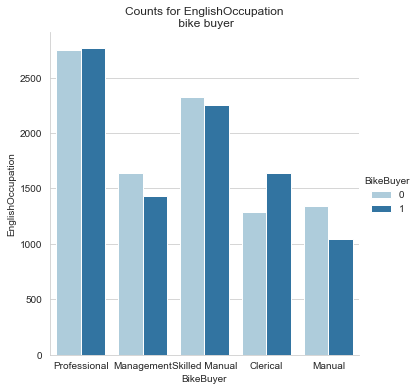

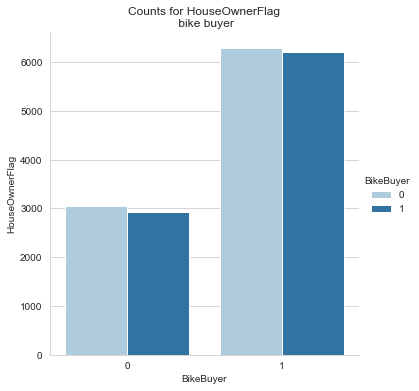

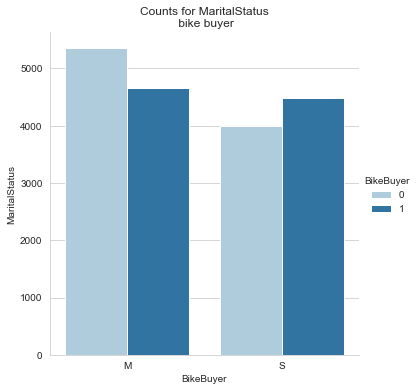

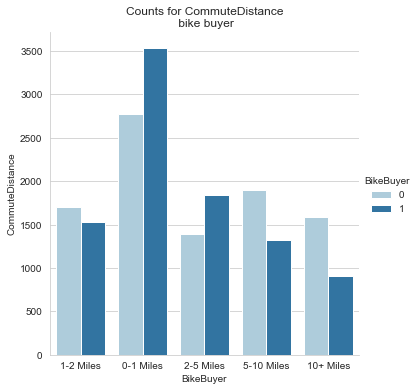

In [82]:
def plot_box(data, cols, kind):
    for col in cols:
        sns.set_style("whitegrid")
        if kind == 'box':
            sns.catplot(x='BikeBuyer', y=col, data=data, kind=kind, palette="Paired")
            plt.title('')
        else:
            sns.catplot(x=col, hue="BikeBuyer", data=data, kind=kind, palette="Paired")
            plt.title('Counts for ' + col + '\n bike buyer')

        plt.xlabel('BikeBuyer')
        plt.ylabel(col)
        plt.show()


columns = (list(customer_data.head().columns[5:]))
cols = ['Age', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned', 'MonthsSinceLastPurchase']
cols2 = [col for col in columns if col not in cols]
print(cols2)

plot_box(customer_data, cols, kind='box')
plot_box(customer_data, cols2, kind='count')

features = ['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'Age']
categorical_features = ['CommuteDistance', 'EnglishEducation', 'EnglishOccupation', 'HouseOwnerFlag', 'MaritalStatus']

In [83]:
processed_data = customer_data[features + categorical_features]
processed_data = pd.get_dummies(processed_data, columns=categorical_features)


In [84]:
import numpy as np

labels = np.array(customer_data.BikeBuyer)

X = processed_data[:int(0.85 * len(processed_data))]
X_label = labels[:int(0.85 * len(processed_data))]

y = processed_data[len(X):]
y_label = labels[len(X):]

In [85]:
print(X.shape, y.shape)
X.head()


(15711, 23) (2773, 23)


,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,Age,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles,EnglishEducation_Bachelors,...,EnglishEducation_Partial High School,EnglishOccupation_Clerical,EnglishOccupation_Management,EnglishOccupation_Manual,EnglishOccupation_Professional,EnglishOccupation_Skilled Manual,HouseOwnerFlag_0,HouseOwnerFlag_1,MaritalStatus_M,MaritalStatus_S
0,0,0,2,49,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
1,1,3,3,45,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
2,1,3,3,50,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,1,0
3,1,0,0,48,0,0,0,0,1,1,...,0,0,0,0,1,0,1,0,0,1
4,4,5,5,42,0,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X, X_label, test_size=0.2, random_state=12)

model = SVC()
model.fit(X_train, Y_train)

result = model.score(X_test, Y_test)
print('Accuracy:', result * 100, '%')


Accuracy: 59.62456251988546 %


In [87]:
test = model.predict(y)

In [88]:
print(test)
print('Accuracy: ', sum(test == y_label) / len(test) * 100, '%')

[0 0 0 ... 1 1 1]
Accuracy:  69.13090515686982 %


In [89]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define dataset
X1, y1 = make_regression(n_samples=15711, n_features=23, n_informative=23, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X1, y1)
importance = model.coef_
importance = np.array(importance)
importance = np.sort(importance)[::-1]

d = {}
for i, v in enumerate(importance):
    d[list(X.columns)[i]] = v

df = pd.DataFrame(data=d, index=['A']).T

In [90]:
df

,A
NumberCarsOwned,98.214026
NumberChildrenAtHome,90.500535
TotalChildren,88.601764
Age,80.289417
CommuteDistance_0-1 Miles,76.279459
CommuteDistance_1-2 Miles,66.270069
CommuteDistance_10+ Miles,65.070040
CommuteDistance_2-5 Miles,63.203427
CommuteDistance_5-10 Miles,62.404862
EnglishEducation_Bachelors,61.148488
